In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [287]:
df = pd.read_csv("C:/dataset/DSA_features.csv")

In [14]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [289]:
df_data = df[(df["activity"] == "sitting") | (df["activity"] == "jumping")]

In [291]:
df_data.shape

(960, 272)

In [46]:
df_data["activity"].value_counts()

activity
sitting    480
jumping    480
Name: count, dtype: int64

In [293]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


df_data['activity'] = label_encoder.fit_transform(df_data['activity'])


C:\TempFolder\ipykernel_10740\4236866181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['activity'] = label_encoder.fit_transform(df_data['activity'])


In [295]:
print(df_data["activity"].value_counts())
df_data = df_data.drop(["people"], axis=1)

activity
1    480
0    480
Name: count, dtype: int64


In [297]:
df_data.head()
#activity1은 sitting activity == 0 은 jumping

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1


In [66]:
#dsa data 표준화해보기
from sklearn.preprocessing import StandardScaler

features_to_scale = df_data.drop(['activity'], axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
df_scaled['activity'] = df_data['activity'].values



In [68]:
df_scaled.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,-0.991082,-0.915891,0.880442,-0.792381,-0.915618,-0.693959,1.970595,-0.137287,1.163180,-0.661412,...,-0.525643,-0.842368,0.068442,-0.830050,-0.985256,-0.710550,-0.363086,-0.718711,-0.092075,1
1,-0.988048,-0.914984,0.900648,-0.792458,-0.921024,0.170972,2.028320,-0.128928,1.175725,-0.661756,...,-0.525599,-0.839893,-0.987138,-0.830446,-0.985206,-0.711441,-0.363077,-0.718108,0.453045,1
2,-0.996852,-0.920168,0.900623,-0.792508,-0.926138,-0.507888,2.028418,-0.128956,1.180171,-0.661823,...,-0.525661,-0.843445,-0.640229,-0.829916,-0.984551,-0.710099,-0.363105,-0.719958,-0.076549,1
3,-1.035725,-0.918888,0.881398,-0.792501,-0.925200,-1.007332,2.052721,-0.099626,1.179985,-0.661421,...,-0.525677,-0.844416,-0.285526,-0.828197,-0.981638,-0.708166,-0.363041,-0.715879,0.265724,1
4,-1.071009,-0.917614,0.898810,-0.792524,-0.928405,2.409210,2.074969,-0.116402,1.183253,-0.661786,...,-0.525623,-0.841209,-0.671621,-0.826544,-0.980639,-0.706898,-0.363083,-0.718532,0.296842,1


In [74]:
RANDOM_SEED = 240

In [341]:
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=RANDOM_SEED)

X_train = X_train[X_train.activity == 1]
X_train = X_train.drop(['activity'], axis=1)

X_train, X_valid = train_test_split(X_train, test_size=0.08, random_state=RANDOM_SEED)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_train = X_train.values
X_valid = X_valid.values
X_test = X_test.values

X_train.shape

(358, 270)

In [343]:
X_valid.shape
#합 378

(32, 270)

In [347]:
input_dim = X_train.shape[1]  # 입력 차원 (특성 수)
encoding_dim = 32

# 입력 레이어
input_layer = Input(shape=(input_dim,))

# 인코더: 점진적으로 차원 축소
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 디코더: 점진적으로 차원 확장
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 입력 차원으로 복원

# 오토인코더 모델 구성
autoencoder = Model(inputs=input_layer, outputs=decoded)

# 모델 컴파일
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           8,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 270)                 │           4,590 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,062 (54.93 KB)

 Trainable params: 14,062 (54.93 KB)

 Non-trainable params: 0 (0.00 B)

In [349]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,  # 에포크 수
    batch_size=256,
    shuffle=True,
    validation_data=(X_valid, X_valid)  # 검증 데이터
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 592ms/step - loss: 1.1571 - val_loss: 1.1731
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.1521 - val_loss: 1.1689
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.1432 - val_loss: 1.1632
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 1.1343 - val_loss: 1.1557
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 1.1283 - val_loss: 1.1463
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 1.1161 - val_loss: 1.1349
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 1.1029 - val_loss: 1.1213
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.0921 - val_loss: 1.1053
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 1.0713 - val_loss: 1.0865
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1.0538 - val_loss: 1.0648
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 1.0335 - val_loss: 1.0400
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.0095 - val_loss: 1.

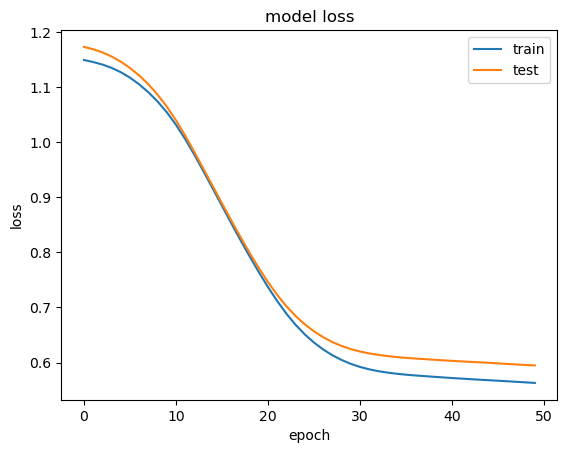

In [351]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [353]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


,reconstruction_error,true_class
count,192.000000,192.000000
mean,1.028078,0.468750
std,0.857651,0.500327
min,0.347954,0.000000
25%,0.482924,0.000000
50%,0.648702,0.000000
75%,1.271205,1.000000
max,5.105789,1.000000


In [355]:
error_df.head()

,reconstruction_error,true_class
756,0.721116,0
254,0.636334,1
437,0.497107,1
520,1.451426,0
775,0.642008,0


In [371]:
threshold = 0.64


In [357]:
LABELS = ["jumping", "sitting"]

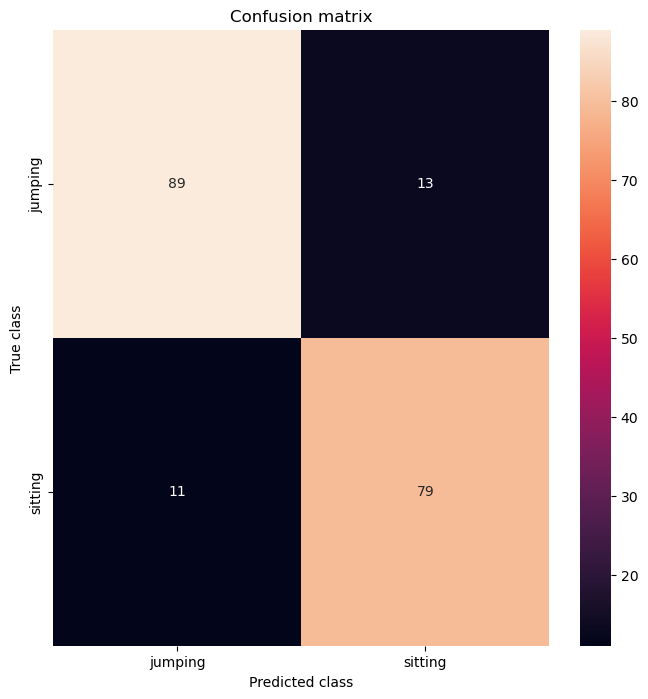

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       102
           1       0.86      0.88      0.87        90

    accuracy                           0.88       192
   macro avg       0.87      0.88      0.87       192
weighted avg       0.88      0.88      0.88       192



In [373]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [ ]:
acc : 0.88

In [375]:
#dsa데이터를 표준화하지않고 사용
X_train2, X_test2 = train_test_split(df_data, test_size=0.2, random_state=RANDOM_SEED)

X_train2 = X_train2[X_train2.activity == 1]
X_train2 = X_train2.drop(['activity'], axis=1)

X_train2, X_valid2 = train_test_split(X_train, test_size=0.08, random_state=RANDOM_SEED)

y_test2 = X_test2['activity']
X_test2 = X_test2.drop(['activity'], axis=1)


X_train2.shape

(329, 270)

In [379]:
input_dim2 = X_train2.shape[1]  # 입력 차원 (특성 수)
encoding_dim = 32

# 입력 레이어
input_layer = Input(shape=(input_dim2,))

# 인코더: 점진적으로 차원 축소
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 디코더: 점진적으로 차원 확장
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 입력 차원으로 복원

# 오토인코더 모델 구성
autoencoder2 = Model(inputs=input_layer, outputs=decoded)

# 모델 컴파일
autoencoder2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약 출력
autoencoder2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │           8,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 270)                 │           4,590 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,062 (54.93 KB)

 Trainable params: 14,062 (54.93 KB)

 Non-trainable params: 0 (0.00 B)

In [381]:
history2 = autoencoder2.fit(
    X_train2, X_train2,
    epochs=50,  # 에포크 수
    batch_size=256,
    shuffle=True,
    validation_data=(X_valid2, X_valid2)  # 검증 데이터
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 523ms/step - loss: 1.1532 - val_loss: 1.1368
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 1.1463 - val_loss: 1.1331
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.1439 - val_loss: 1.1282
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1.1395 - val_loss: 1.1215
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.1362 - val_loss: 1.1133
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1.1229 - val_loss: 1.1032
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1.1130 - val_loss: 1.0912
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 1.1043 - val_loss: 1.0770
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 1.0817 - val_loss: 1.0605
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.0652 - val_loss: 1.0415
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.0506 - val_loss: 1.0200
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 1.0261 - val_loss: 0.9957

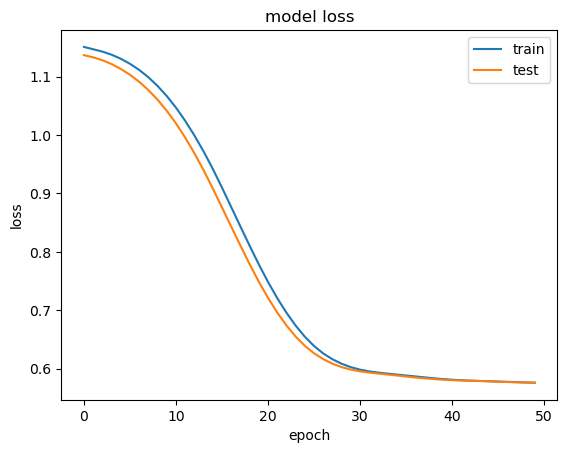

In [383]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [385]:
predictions2 = autoencoder2.predict(X_test2)
mse2 = np.mean(np.power(X_test2 - predictions2, 2), axis=1)
error_df2 = pd.DataFrame({'reconstruction_error': mse2,
                        'true_class': y_test2})
error_df2.describe()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


,reconstruction_error,true_class
count,192.000000,192.000000
mean,284.754800,0.468750
std,394.948058,0.500327
min,5.233788,0.000000
25%,5.308948,0.000000
50%,51.363155,0.000000
75%,501.224013,1.000000
max,2030.349450,1.000000


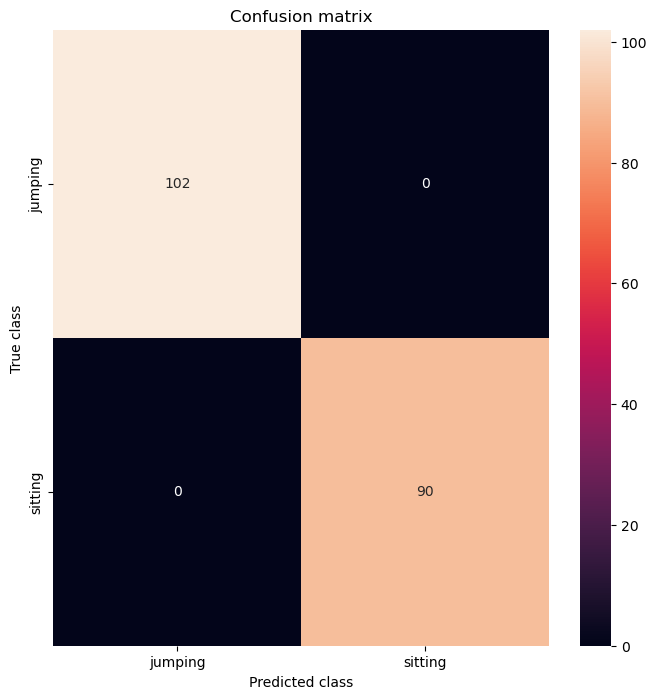

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        90

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



In [399]:
threshold2 = 30
y_pred2 = [0 if e > threshold2 else 1 for e in error_df2.reconstruction_error.values]
conf_matrix2 = confusion_matrix(error_df2.true_class, y_pred2)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix2, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df2.true_class, y_pred2))

In [ ]:
acc: 1